In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore' )
import datetime
import math
#from pandas_datareader import data, wb
import io
sns.set_style('darkgrid')
import plotly.express as px

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller





In [2]:

import yfinance as yf

# Initializing the Ticker object
rel_ticker ='RELIANCE.NS'

# Extracting the history
df = yf.download(tickers= rel_ticker,start='2015-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  405.186554  407.792389  403.975037  405.917999  382.812164   
2015-01-02  406.009430  409.643921  404.272217  404.843658  381.798981   
2015-01-05  404.592224  407.289520  399.609100  400.409149  377.616882   
2015-01-06  397.734741  399.106232  380.362396  382.236786  360.478943   
2015-01-07  382.693970  392.614471  382.648254  390.557220  368.325775   

              Volume  
Date                  
2015-01-01   1481821  
2015-01-02   3665683  
2015-01-05   5051970  
2015-01-06   9313990  
2015-01-07  10360156

In [4]:
df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-06  2986.899902  3018.000000  2957.000000  3006.000000  3006.000000   
2024-03-07  3005.949951  3006.199951  2951.100098  2957.850098  2957.850098   
2024-03-11  2978.000000  2978.000000  2927.000000  2933.199951  2933.199951   
2024-03-12  2933.199951  2976.000000  2930.050049  2950.850098  2950.850098   
2024-03-13  2959.550049  2966.199951  2930.449951  2937.100098  2937.100098   

             Volume  
Date                 
2024-03-06  3902838  
2024-03-07  4157863  
2024-03-11  5638565  
2024-03-12  4716339  
2024-03-13  1139584

In [5]:
df.shape

(2271, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2271 entries, 2015-01-01 to 2024-03-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2271 non-null   float64
 1   High       2271 non-null   float64
 2   Low        2271 non-null   float64
 3   Close      2271 non-null   float64
 4   Adj Close  2271 non-null   float64
 5   Volume     2271 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 124.2 KB


In [7]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  2271.000000  2271.000000  2271.000000  2271.000000  2271.000000   
mean   1370.705853  1385.118748  1355.535383  1369.810158  1353.027215   
std     768.064540   775.059920   760.548763   767.642533   771.634812   
min     373.322052   373.824921   364.110138   370.647614   349.549438   
25%     609.619904   614.065857   603.139557   607.962677   587.116608   
50%    1184.975220  1202.347534  1174.003174  1185.706665  1165.057007   
75%    2171.818115  2195.793213  2148.512573  2174.379517  2163.230713   
max    3011.550049  3024.899902  2974.449951  3014.800049  3014.800049   

             Volume  
count  2.271000e+03  
mean   9.416897e+06  
std    6.950610e+06  
min    8.528280e+05  
25%    5.452075e+06  
50%    7.448303e+06  
75%    1.073288e+07  
max    7.134168e+07

In [18]:
df_new = df.reset_index()

In [20]:
df_new.head()

Date        Open        High         Low       Close   Adj Close  \
0 2015-01-01  405.186554  407.792389  403.975037  405.917999  382.812164   
1 2015-01-02  406.009430  409.643921  404.272217  404.843658  381.798981   
2 2015-01-05  404.592224  407.289520  399.609100  400.409149  377.616882   
3 2015-01-06  397.734741  399.106232  380.362396  382.236786  360.478943   
4 2015-01-07  382.693970  392.614471  382.648254  390.557220  368.325775   

     Volume  Close: 30 Day Mean  
0   1481821                 NaN  
1   3665683                 NaN  
2   5051970                 NaN  
3   9313990                 NaN  
4  10360156                 NaN

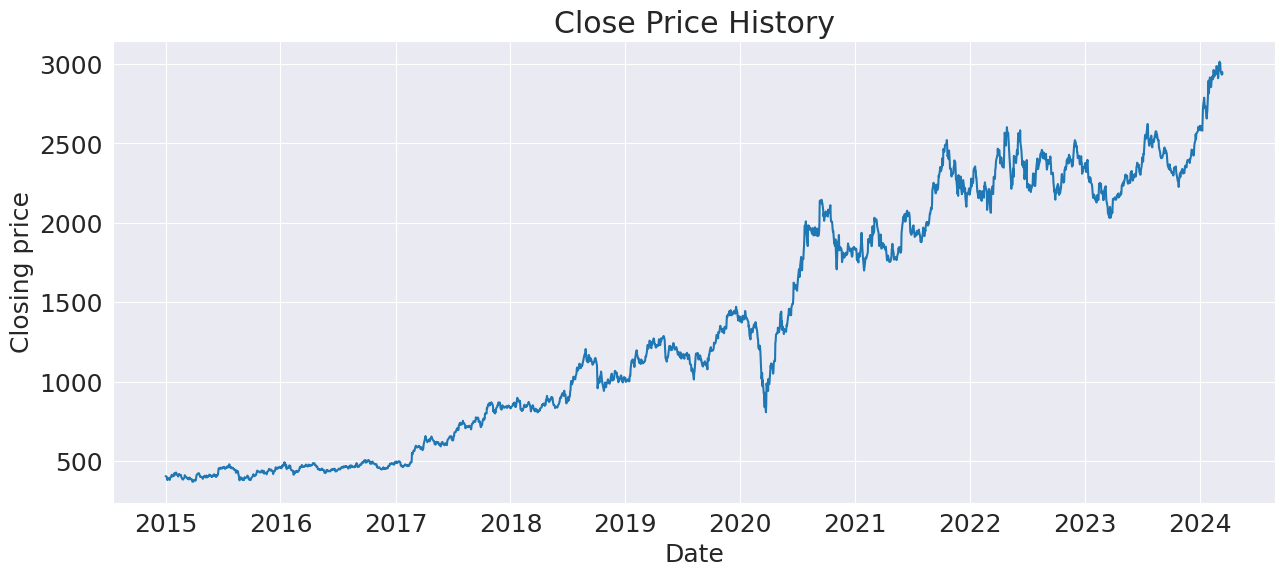

In [8]:
# ploting close price
import datetime
plt.figure(figsize=(15,6))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing price",fontsize = 18)
plt.show()

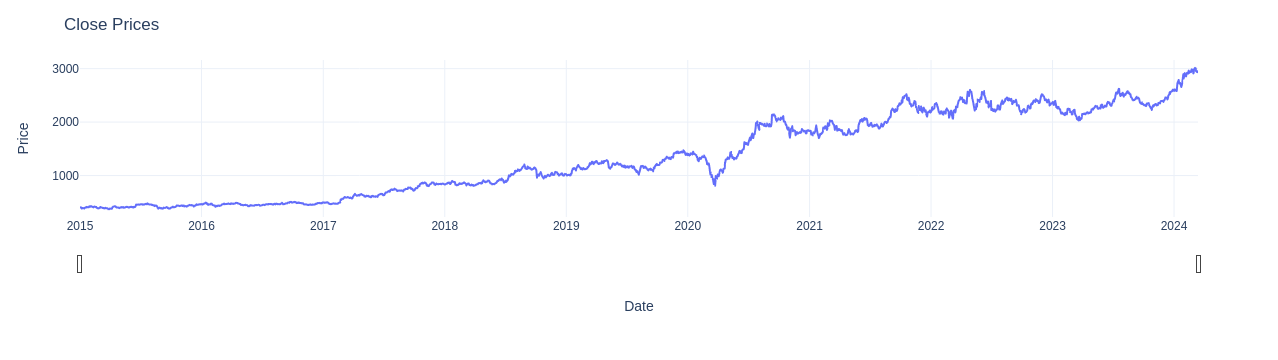

In [9]:
fig = px.line(x=df.index, y=df['Close'])

# Updating layout
fig.update_layout(
    title='Close Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis_rangeslider_visible=True
)

# Showing figure
fig.show()

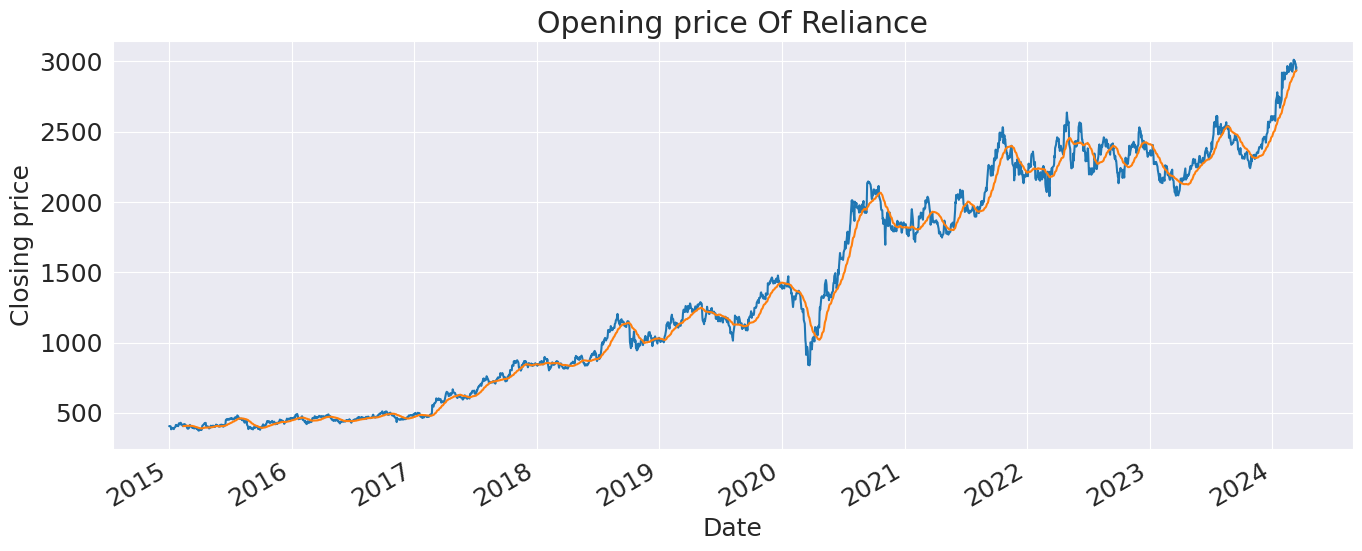

In [10]:
# 30 days moving average
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot(label="30-day Moving Average")
plt.title("Opening price Of Reliance")
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing price",fontsize = 18)
plt.show()

In [31]:
monthvise= df_new.groupby(df_new['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open        Close
Date                               
January    1365.300196  1363.627628
February   1396.238190  1396.255925
March      1278.623576  1278.781961
April      1239.385712  1240.092319
May        1258.370674  1255.948297
June       1320.399131  1320.558159
July       1354.127568  1354.305522
August     1410.334070  1409.410638
September  1455.309823  1454.575669
October    1450.858930  1448.533940
November   1448.471835  1446.714955
December   1467.684915  1465.641522

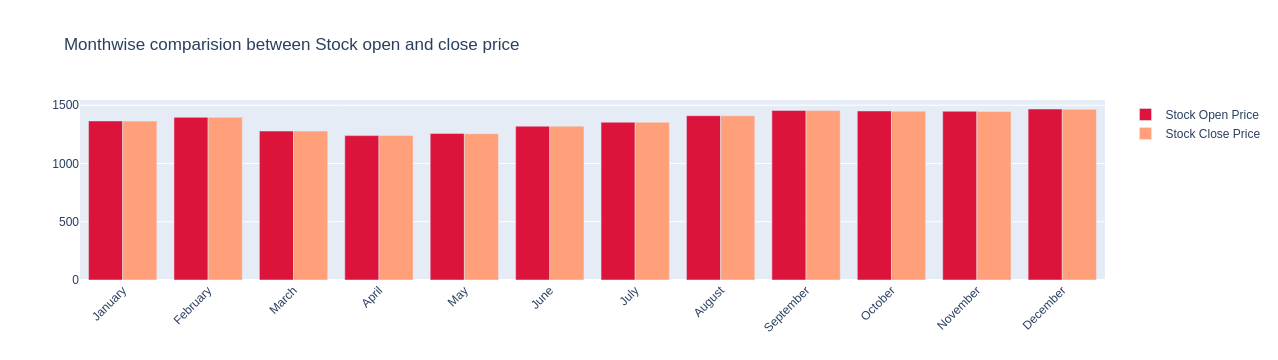

In [30]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()


In [28]:
df_new.groupby(df_new['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = df_new.groupby(df_new['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = df_new.groupby(df_new['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Relieance high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Relieance low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

Text(0.5, 1.0, 'Closing Price')

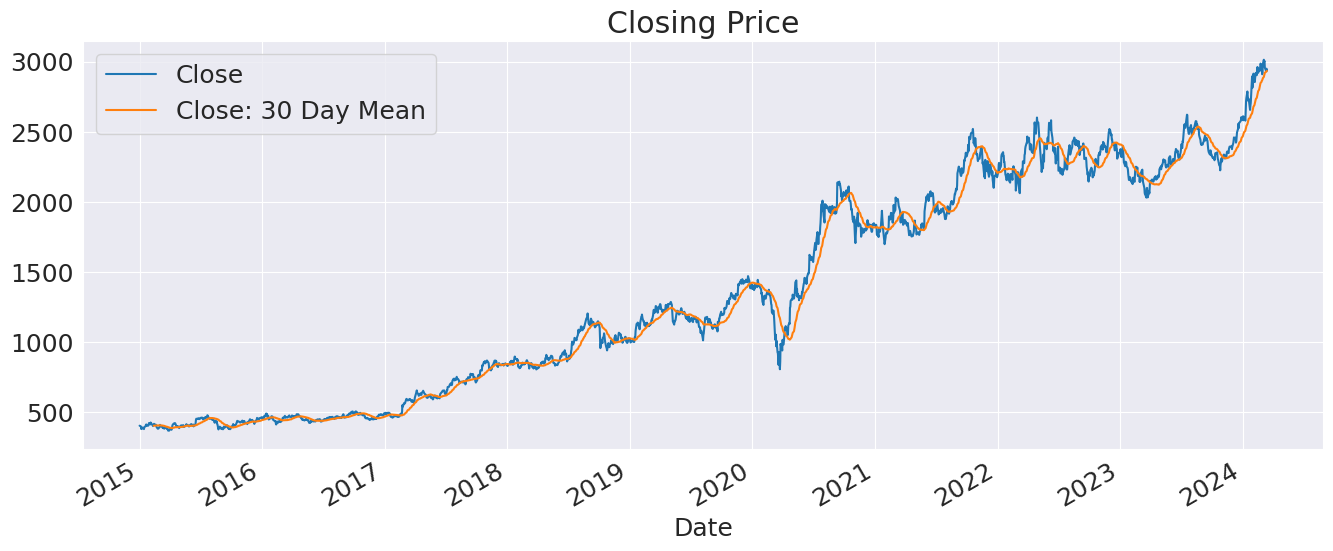

In [11]:
df['Close: 30 Day Mean']=df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.title("Closing Price")

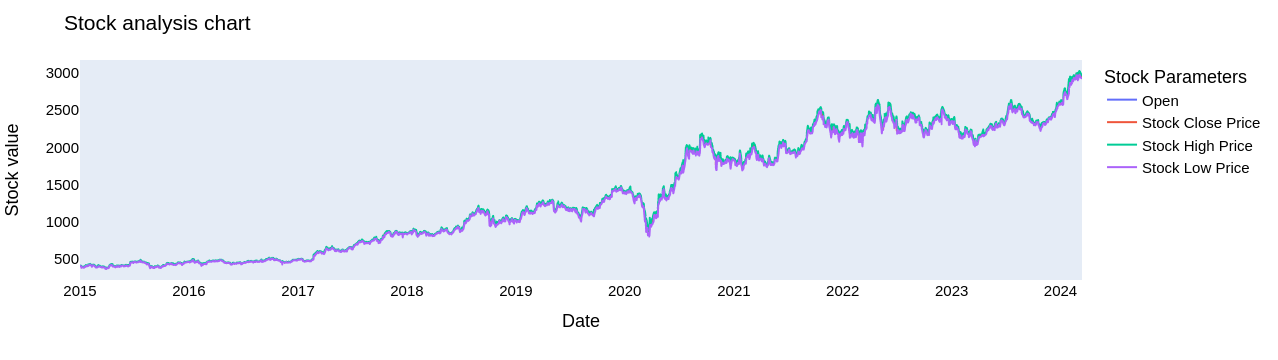

In [34]:
from itertools import cycle
names = cycle(['Open','Stock Close Price','Stock High Price','Stock Low Price'])
fig = px.line(df_new, x=df_new.Date, y=[df_new['Open'], df_new['Close'], 
                                          df_new['High'], df_new['Low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/home/sumeetmaheshwari/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




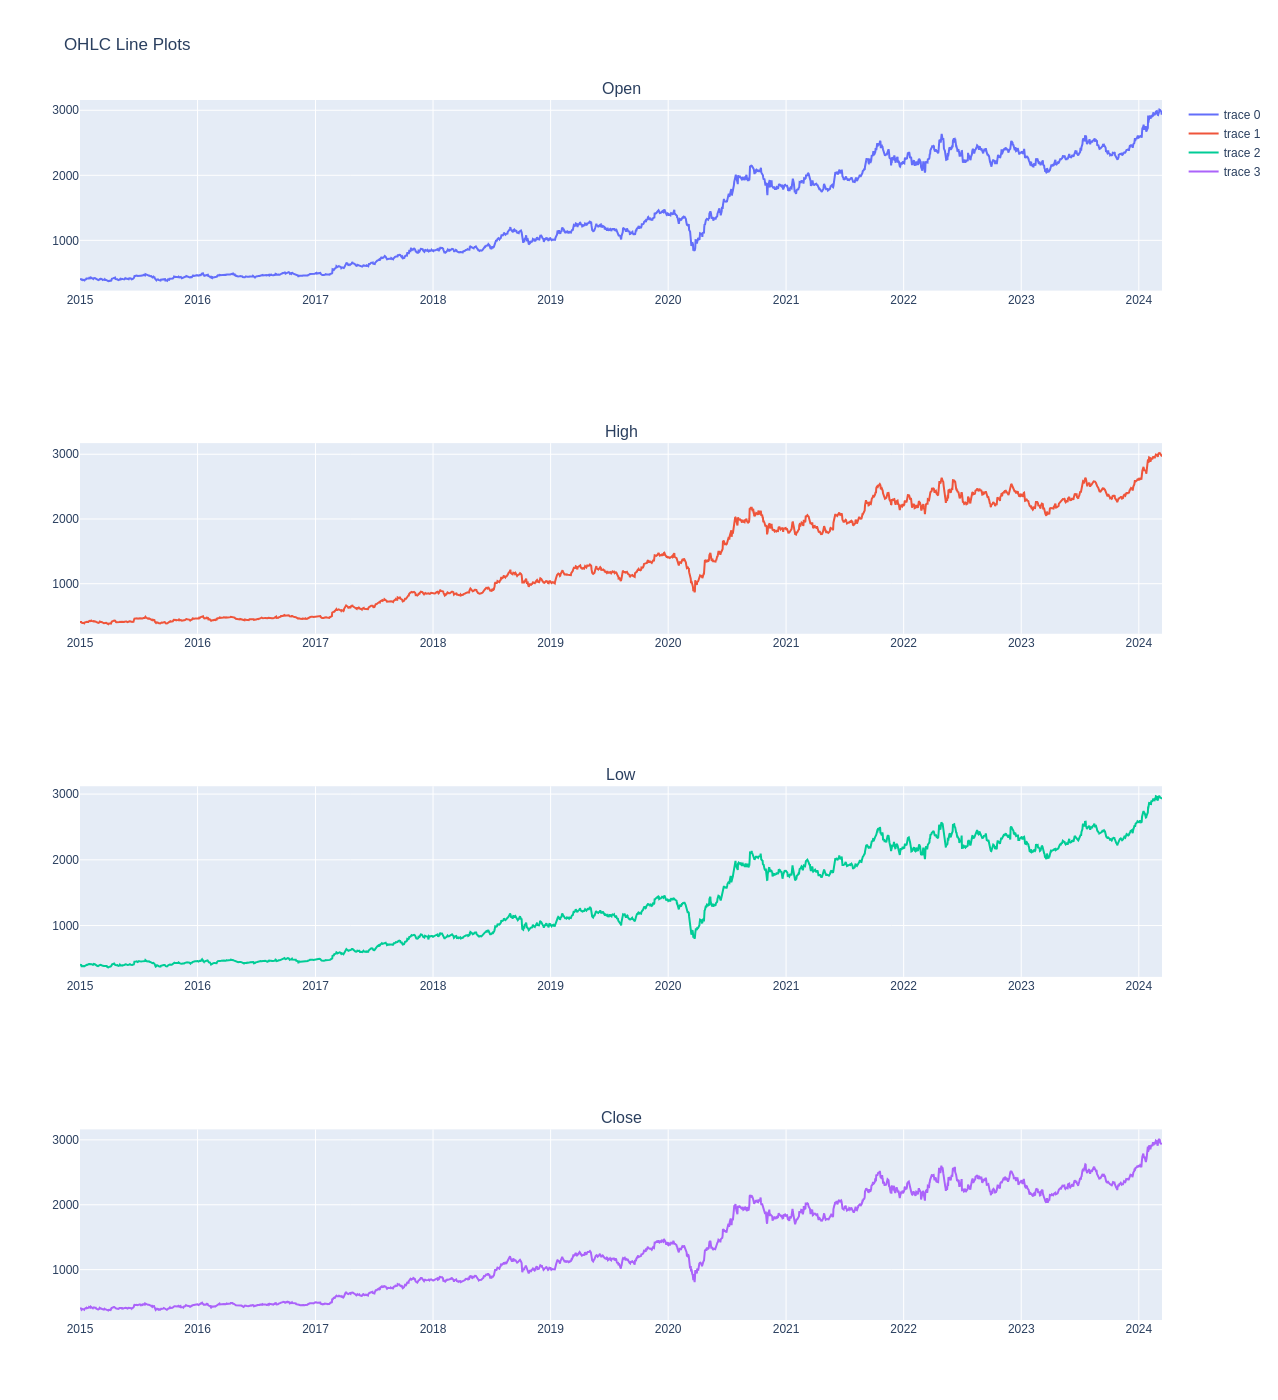

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=4, cols=1,subplot_titles=('Open','High','Low','Close'))

fig.add_trace(
    Line(x=df.index, y=df.Open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.High),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.Low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.index, y=df.Close),
    row=4, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

In [13]:
# **candle Plot**
# Creating the figure object
import plotly.graph_objects as go
fig = go.Figure()

# Creating the Candlestick plot
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
))

# Updating layout
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis_rangeslider_visible=True
)
fig.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
ts = df['Adj Close']
# assuming your time series data is stored in a variable called 'ts'
result = adfuller(ts)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.071905
p-value: 0.964090
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


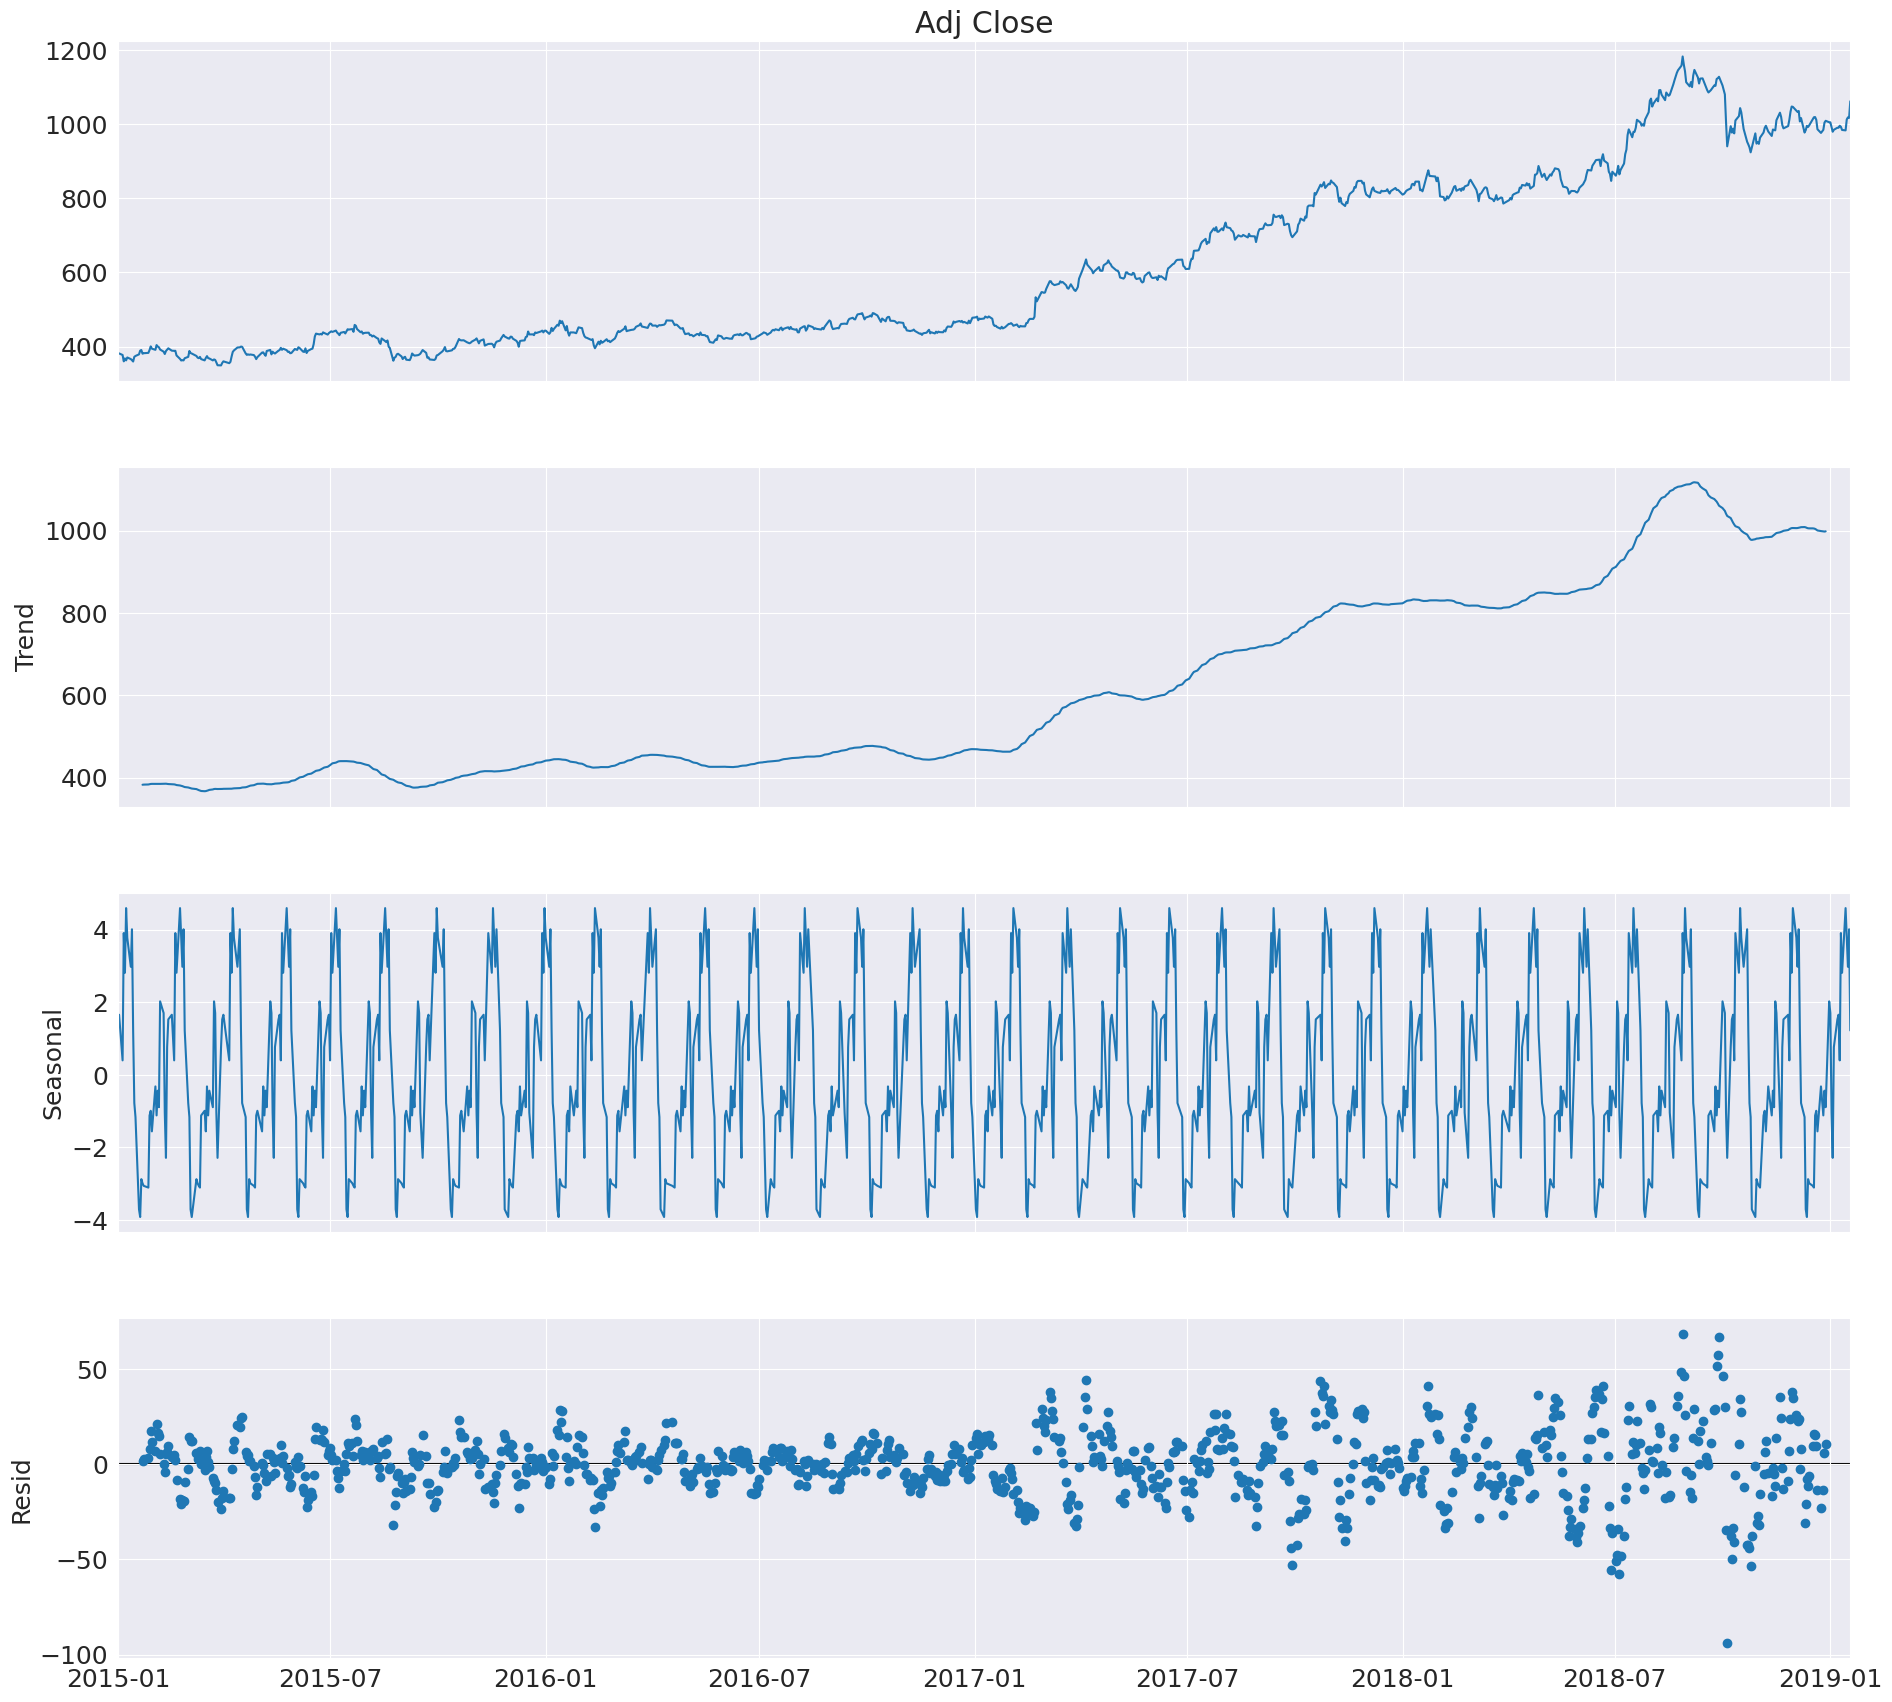

In [40]:
#only first 5000 values are taken because it was looking very crowded
result = seasonal_decompose(df["Adj Close"].head(1000), model='additive', period = 30)
fig = go.Figure()  
fig = result.plot()  
fig.set_size_inches(20, 19)

In [41]:
plot_acf(df['Adj Close'], alpha = 0.05)

In [42]:
plot_pacf(df['Adj Close'], alpha = 0.05);

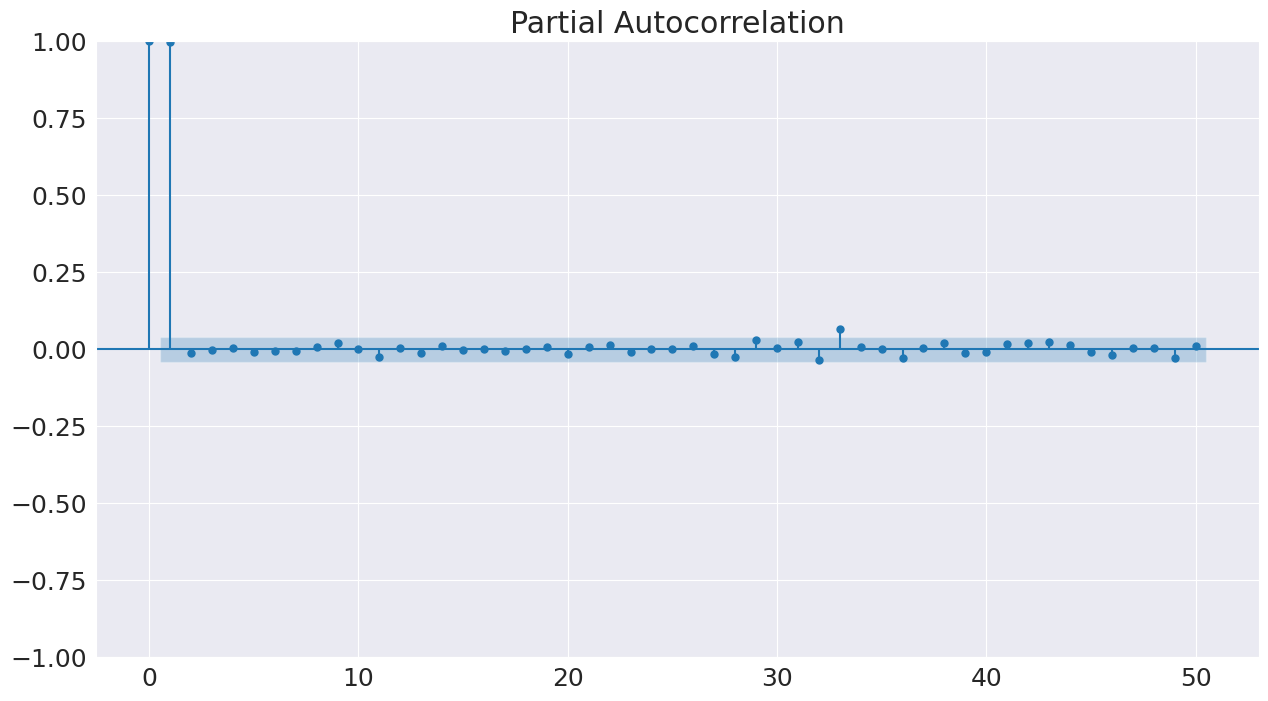

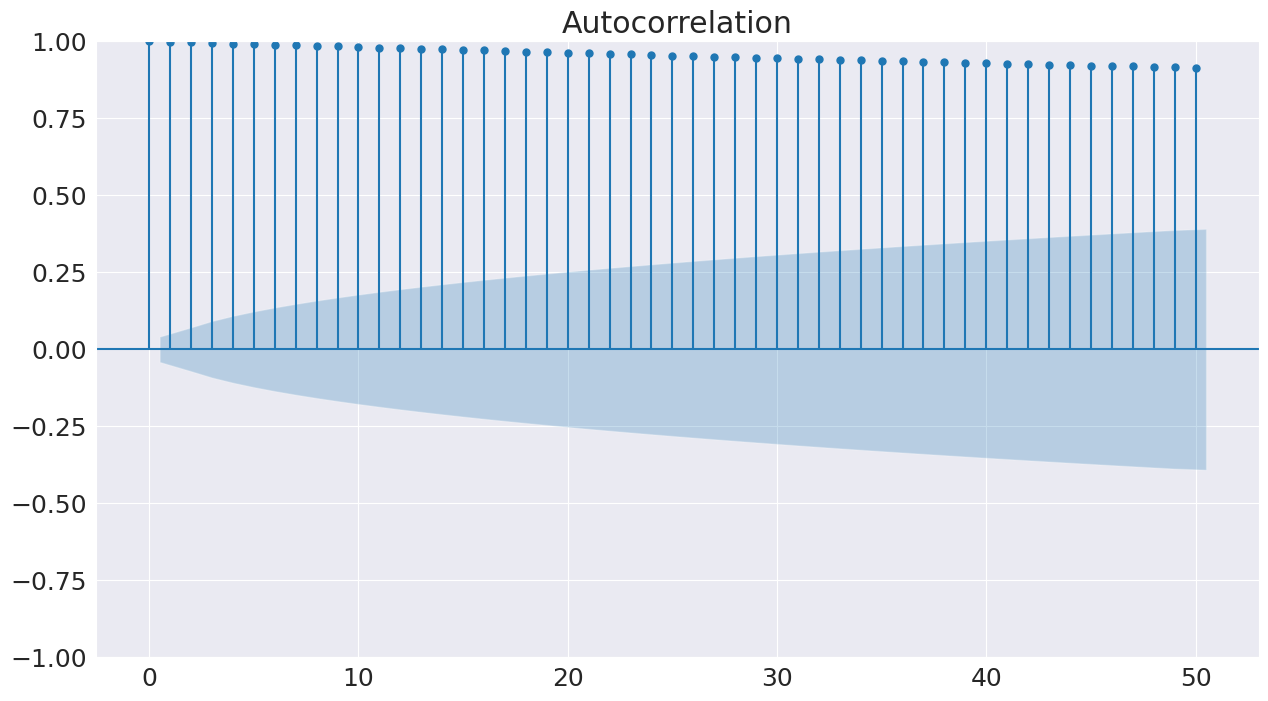

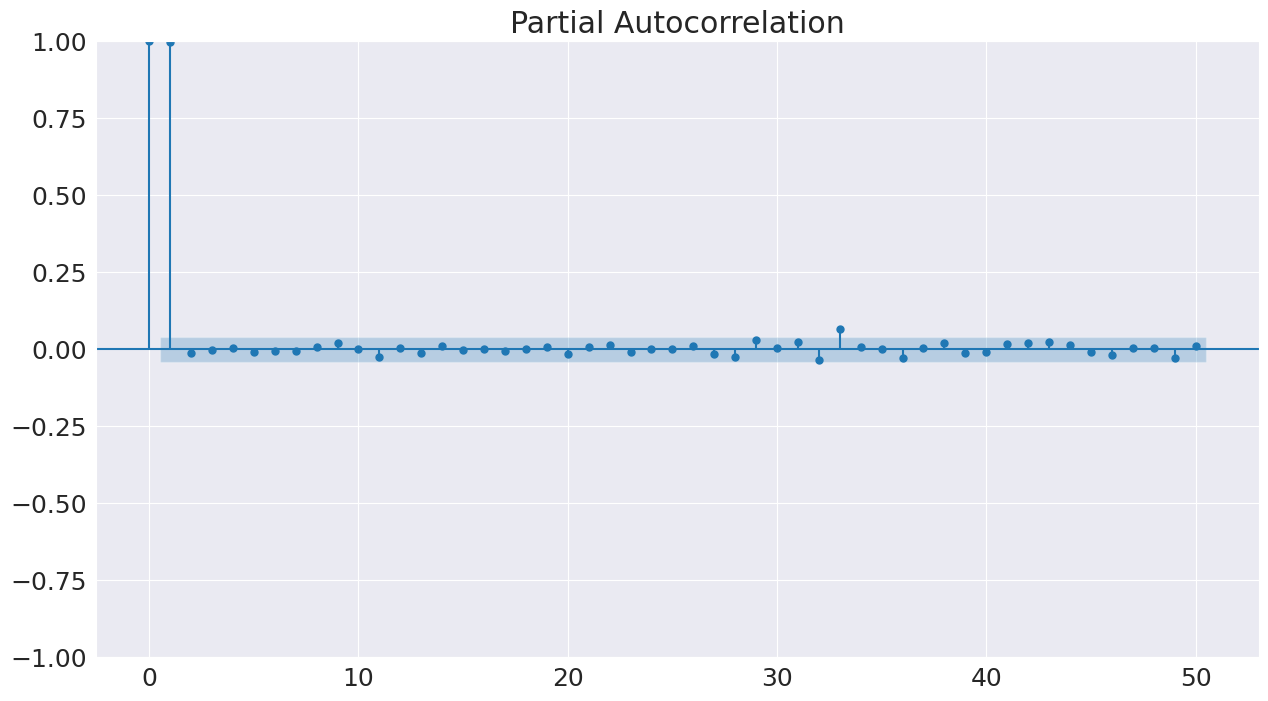

In [44]:

import statsmodels.api as sm

p = 1
d = 1
q = 1

train_np = df['Adj Close'].values.astype('float64')
model = sm.tsa.ARIMA(train_np, order=(p, d, q))


# Define the order of differencing, AR, and MA terms
model_fit = model.fit()

# Plot ACF and PACF
plot_acf(train_np, lags=50)
plot_pacf(train_np, lags=50)